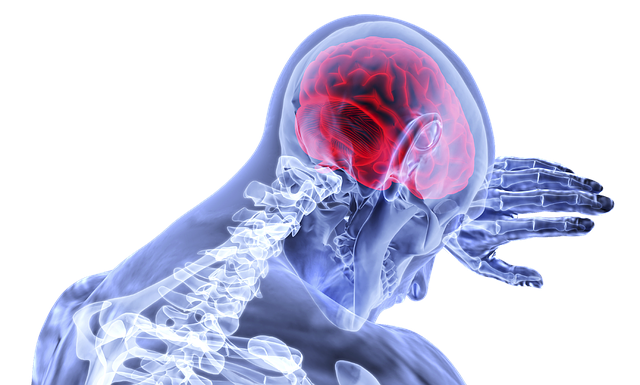

**Stroke is a leading cause of death in the US and a major cause of severe disability in adults. The sudden death of living brain cells due to loss of blood flow or lack of  oxygen flow to brain is almost fatal.**

The stroke prediction dataset used here contains data like age, average glucose level in body, whether or not they had a heart disease or hypertension, etc of patients.The data is split into training and test data and the training data is used to create models that predict whether or not an entry from the test data will suffer a stroke.

**Let us undetstand the elements of the dataset, make some general observations and develop a model to predict stroke on new data.**


## Importing libraries

In [1]:
import pandas as pd
import numpy as np

#Importing data visulaisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno
import warnings

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings('ignore')

In [2]:
# pip install missingno

# Data Collection

In [3]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
# df = df.drop(['id'],axis=1)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [6]:
print('Shape of dataframe:',df.shape) #Shape of the dataframe
print('\n')
print('Columns of the dataset:',df.columns) #Names of columns of the dataset

Shape of dataframe: (5110, 12)


Columns of the dataset: Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [7]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

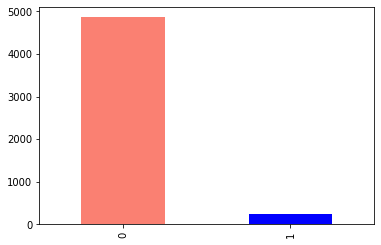

In [8]:
# Plot the value counts with a bar graph
df.stroke.value_counts().plot(kind="bar", color=["salmon", "blue"]);

<Figure size 1440x1440 with 0 Axes>

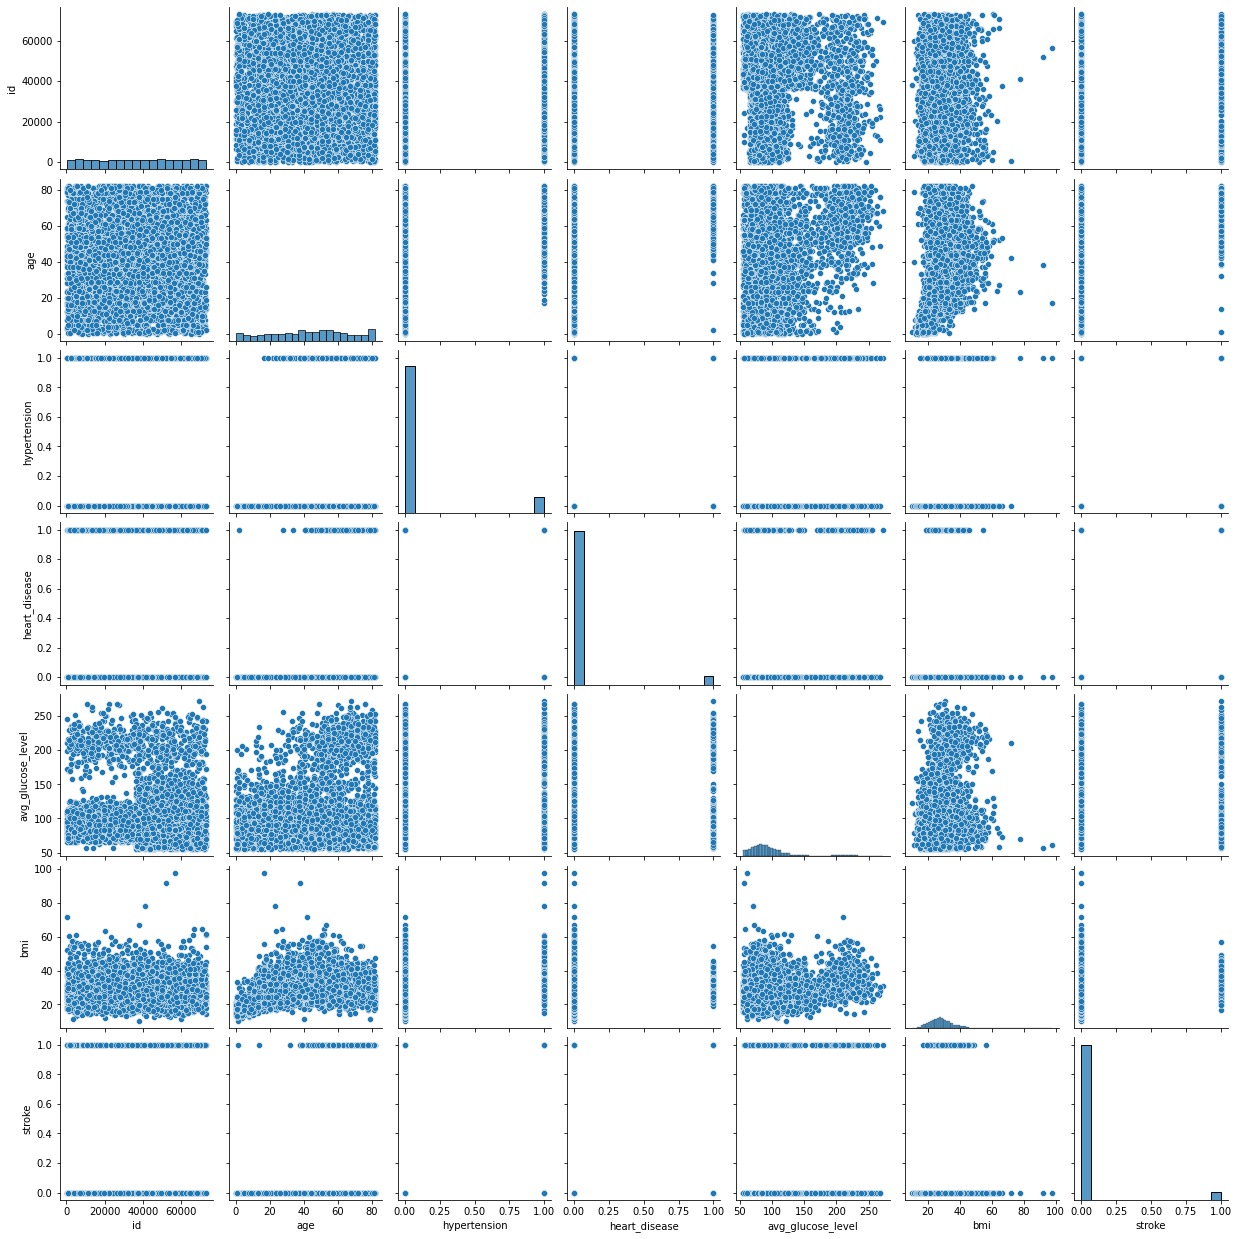

In [9]:
plt.figure(figsize=(20,20))
sns.pairplot(df)
plt.show()

# Data Preparation

#### Missing values

In [10]:
print(df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


<AxesSubplot:>

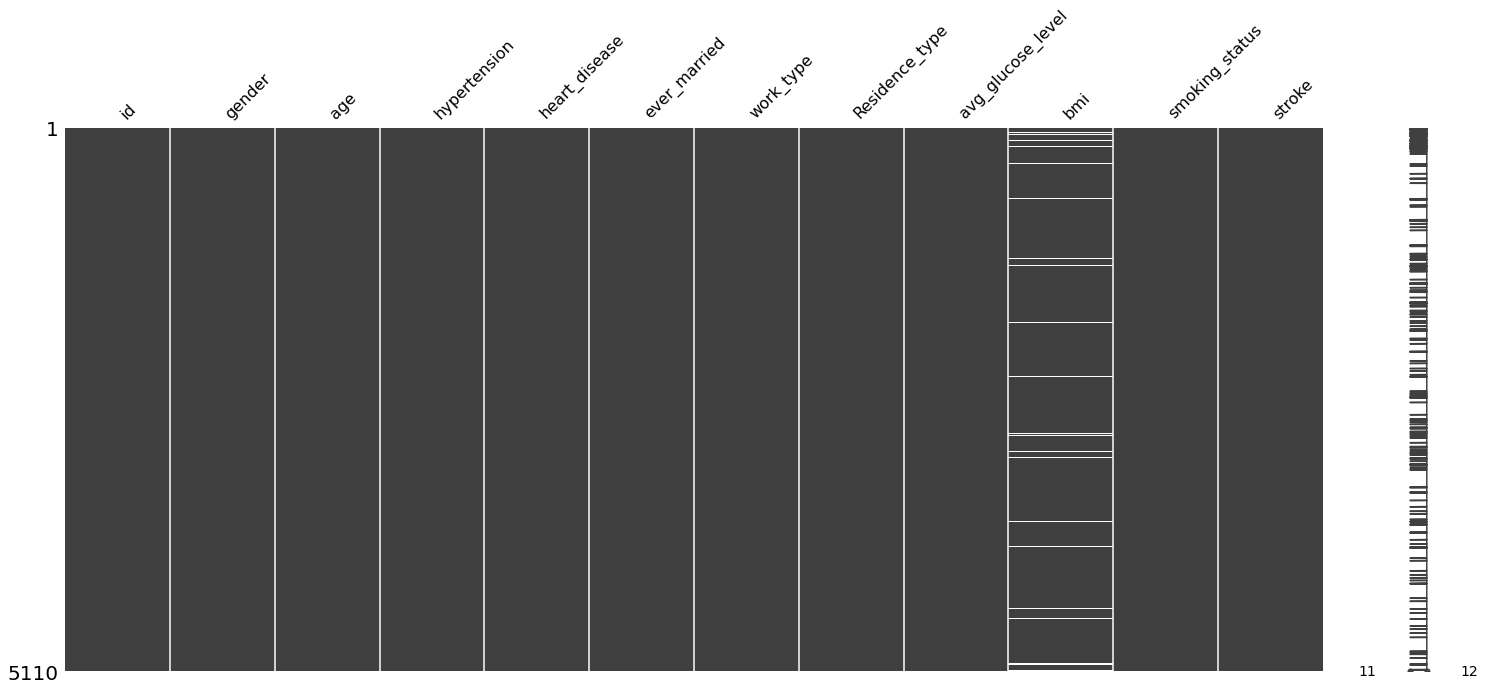

In [11]:
msno.matrix(df)

<AxesSubplot:>

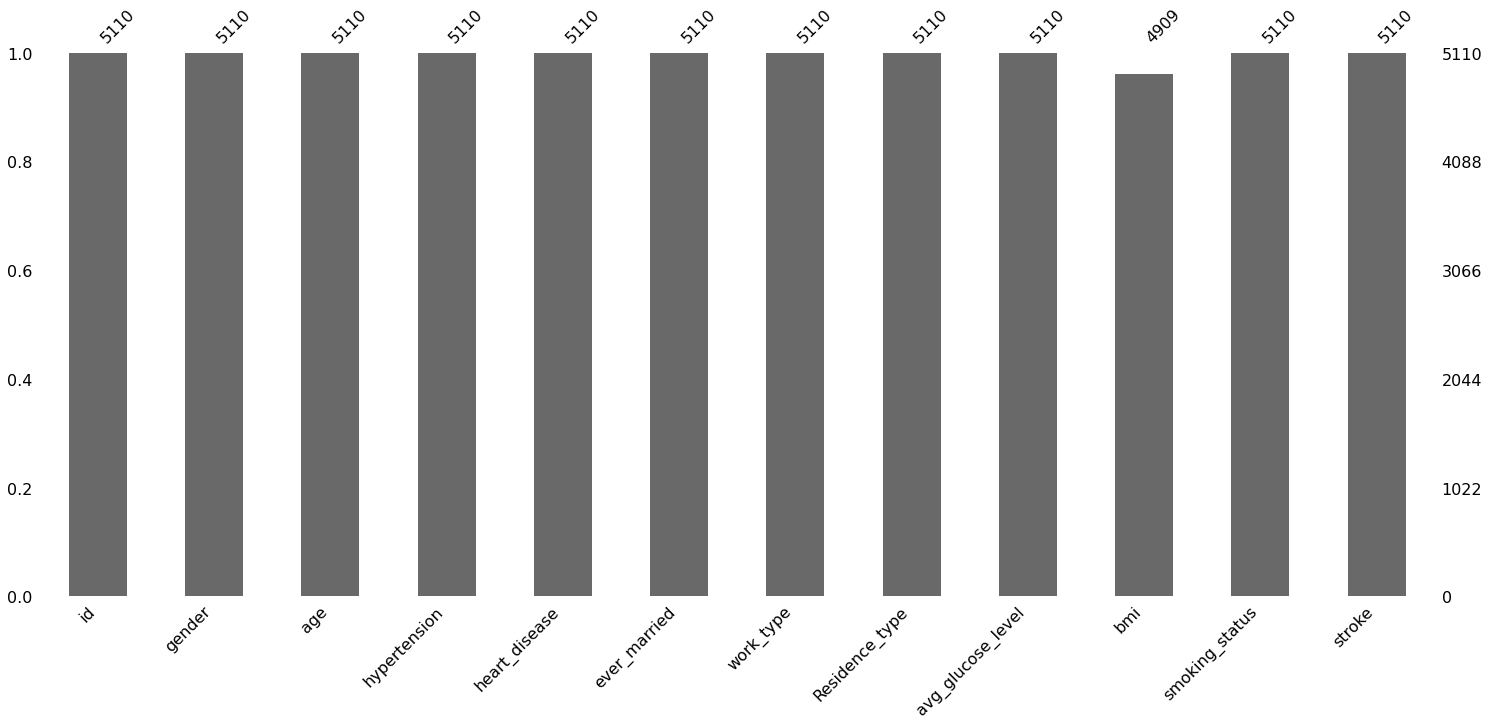

In [12]:
msno.bar(df)

**Alphabetical Columns**

In [13]:
print(df.gender.unique())
print(df.work_type.unique())
print(df.Residence_type.unique())
print(df.smoking_status.unique())
print(df.ever_married.unique())

['Male' 'Female']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
['Yes' 'No']


**fill the missing value**

In [14]:
df.bmi.replace(to_replace=np.nan, value=df.bmi.mean(), inplace=True)

<AxesSubplot:>

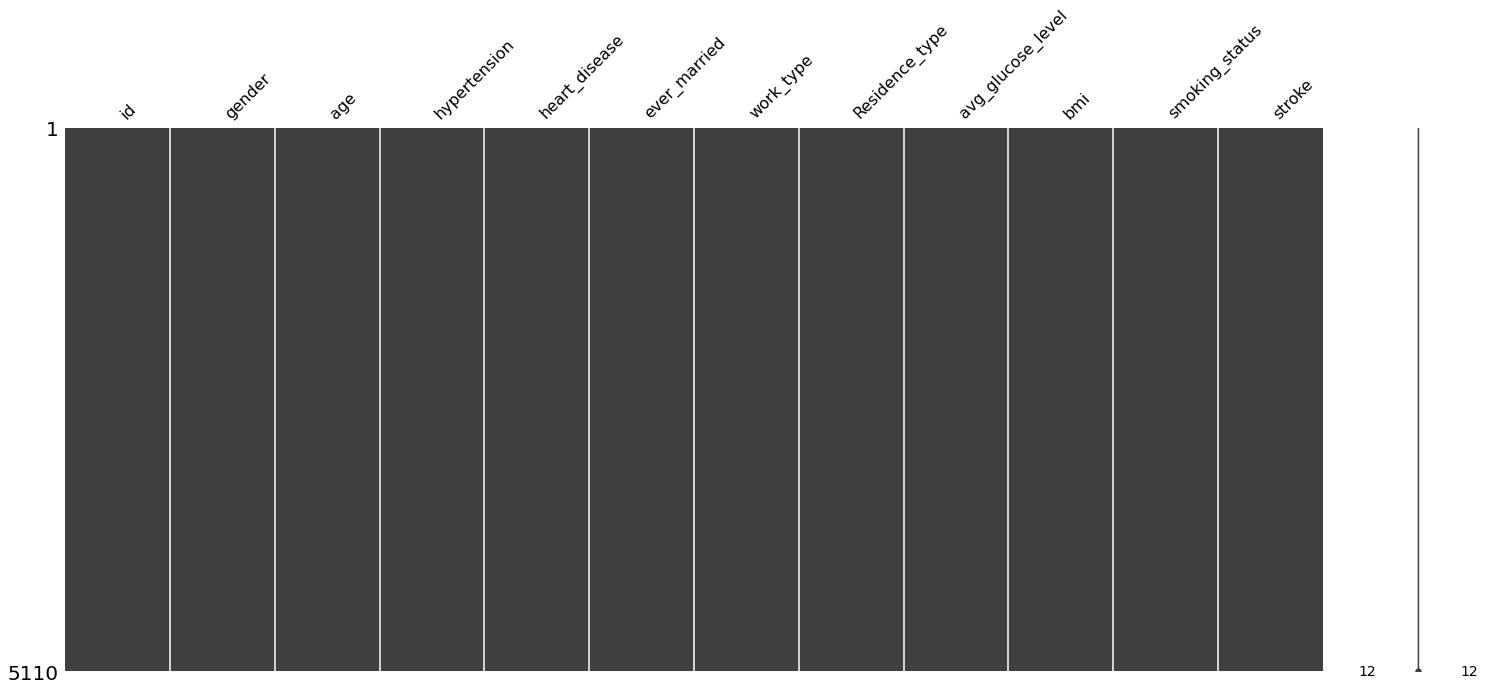

In [15]:
msno.matrix(df)

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.893237,7.698018,10.30,23.800,28.400,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


## Exploratory Data Analysis

### Heatmap

<AxesSubplot:>

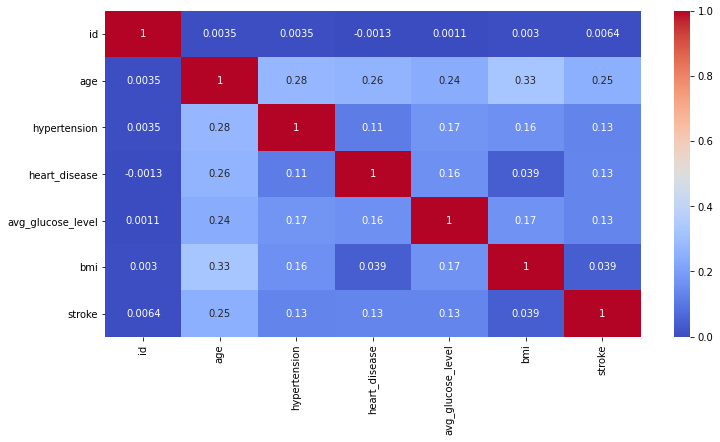

In [17]:
#Plotting a heatmap to find correlations between the variables.

plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

### Gender and chances of stroke

               stroke
gender stroke        
Female 0         2853
       1          141
Male   0         2008
       1          108


Text(0.5, 1.0, 'Gender wise stroke count')

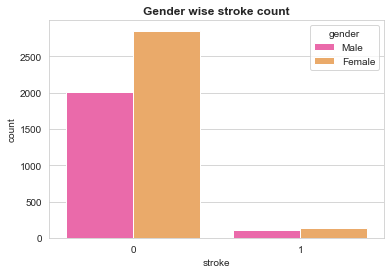

In [18]:
print(df.groupby('gender').stroke.value_counts().to_frame())

sns.set_style('whitegrid')
sns.countplot(x='stroke',data=df,hue='gender',palette='spring')
plt.title('Gender wise stroke count',fontweight='bold')

### Relation between gender and hypertension

gender  hypertension
Female  0               2718
        1                276
Male    0               1894
        1                222
Name: hypertension, dtype: int64


Text(0.5, 1.0, 'Gender wise hypertension count')

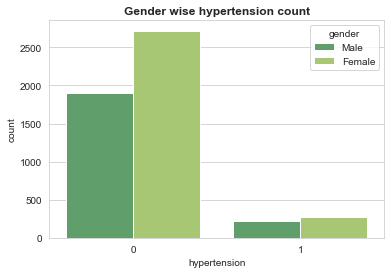

In [19]:
print(df.groupby('gender').hypertension.value_counts())

sns.countplot(x='hypertension',data=df,hue='gender',palette='summer')
plt.title('Gender wise hypertension count',fontweight='bold')

### Relation between gender and heart disease

gender  heart_disease
Female  0                2881
        1                 113
Male    0                1953
        1                 163
Name: heart_disease, dtype: int64


Text(0.5, 1.0, 'Gender wise heart disease count')

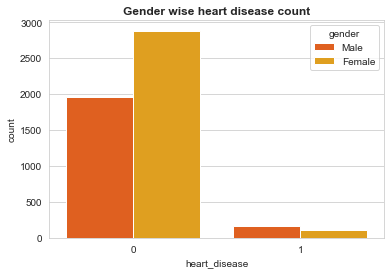

In [20]:
print(df.groupby('gender').heart_disease.value_counts())

sns.countplot(x='heart_disease',data=df,hue='gender',palette='autumn')
plt.title('Gender wise heart disease count',fontweight='bold')

### Relation between residence type and stroke

stroke  Residence_type
0       Urban             2461
        Rural             2400
1       Urban              135
        Rural              114
Name: Residence_type, dtype: int64


<AxesSubplot:xlabel='Residence_type', ylabel='count'>

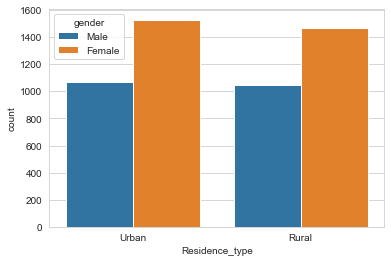

In [21]:
print(df.groupby('stroke').Residence_type.value_counts())

sns.countplot(x='Residence_type',data=df,hue='gender')

### Relation between stroke, gender and their average glucose level

In [22]:
#A function is defined which classifies the average glucose level of the people into various categories like high, low and normal.
#This function is applied on the avg_glucose_level column and another column is added to the dataframe df based on the results obtained on applying this function.

def glucose_level(amount):
    if amount<60:
        return 'Dangerously low'
    elif 60<=amount<90:
        return 'Low'
    elif 90<=amount<110:
        return 'Normal'
    elif 110<=amount<140:
        return 'Slightly high'
    elif 140<=amount<240:
        return 'High'
    elif 240<=amount<300:
        return 'Extremely high'
    else:
        return 'Dangerously high, requires medical attention'
    
#This classification is done based on the data available on the internet.
    
df['Glucose_level_chart']=df['avg_glucose_level'].apply(glucose_level)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Glucose_level_chart
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,High
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,High
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Normal
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,High
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,High


stroke  Glucose_level_chart
0       Low                    2102
        Normal                 1191
        High                    684
        Slightly high           628
        Dangerously low         212
        Extremely high           44
1       High                     82
        Low                      80
        Normal                   44
        Slightly high            24
        Extremely high           11
        Dangerously low           8
Name: Glucose_level_chart, dtype: int64


<AxesSubplot:xlabel='Glucose_level_chart', ylabel='count'>

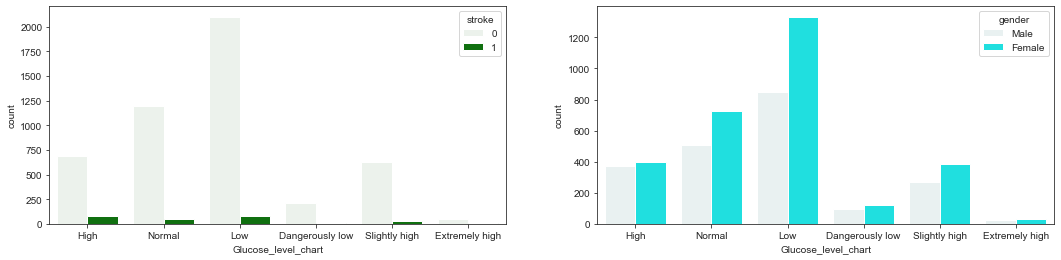

In [23]:
print(df.groupby('stroke').Glucose_level_chart.value_counts())

sns.set_style('ticks')
fig,axes=plt.subplots(1,2,figsize=(18,4))
sns.countplot(ax=axes[0],x='Glucose_level_chart',data=df,hue='stroke',color='green')
sns.countplot(ax=axes[1],x='Glucose_level_chart',data=df,hue='gender',color='cyan')

### Relation between smoking status and stroke

smoking_status   stroke
Unknown          0         1497
                 1           47
formerly smoked  0          815
                 1           70
never smoked     0         1802
                 1           90
smokes           0          747
                 1           42
Name: stroke, dtype: int64


<AxesSubplot:title={'center':'Smoking status analysis'}, xlabel='smoking_status', ylabel='count'>

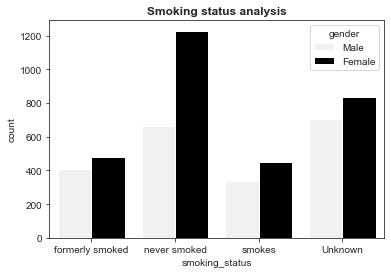

In [24]:
print(df.groupby('smoking_status').stroke.value_counts())

plt.title('Smoking status analysis',fontweight='bold')
plt.xlabel('Smoking status')
sns.countplot(x='smoking_status',data=df,hue='gender',color='black')

### Pairplots 
Pairplots show the correlation of each feature with every other feature.

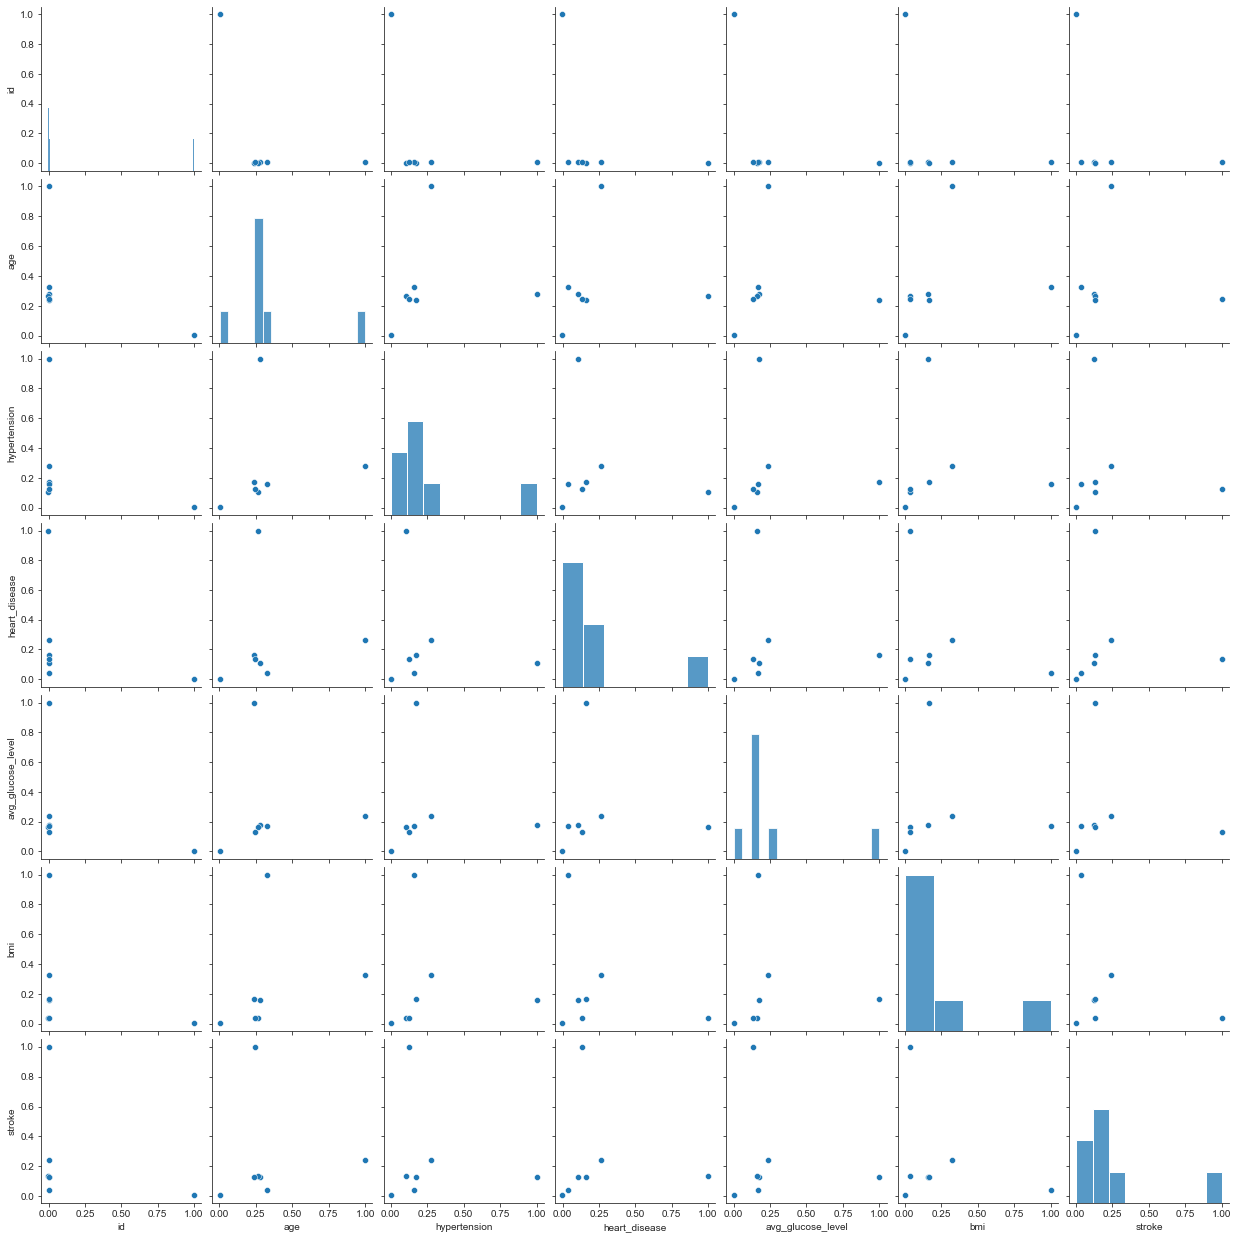

In [25]:
sns.pairplot(df.corr())

#### Getting dummies for categorical column

In [26]:
#Getting dummies for categorical column -'gender' (that has strings)
Gender =pd.get_dummies(df['gender'],drop_first=True)   

#Getting dummies for categorical column -'ever_married' (that has strings)
ever_married = pd.get_dummies(df.ever_married, drop_first=True)

df=pd.concat([df,Gender],axis=1)
df=pd.concat([df,ever_married],axis=1)

In [27]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Glucose_level_chart,Male,Yes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,High,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,High,0,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Normal,1,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,High,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,High,0,1


In [28]:
#Dropping the columns that are not required for training the model.
df.drop(['id','work_type','ever_married','Residence_type','smoking_status','Glucose_level_chart','gender'],axis=1,inplace=True)
# remane 
df.rename(columns = {'Yes':'ever_married'}, inplace = True)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Male,ever_married
0,67.0,0,1,228.69,36.600000,1,1,1
1,61.0,0,0,202.21,28.893237,1,0,1
2,80.0,0,1,105.92,32.500000,1,1,1
3,49.0,0,0,171.23,34.400000,1,0,1
4,79.0,1,0,174.12,24.000000,1,0,1


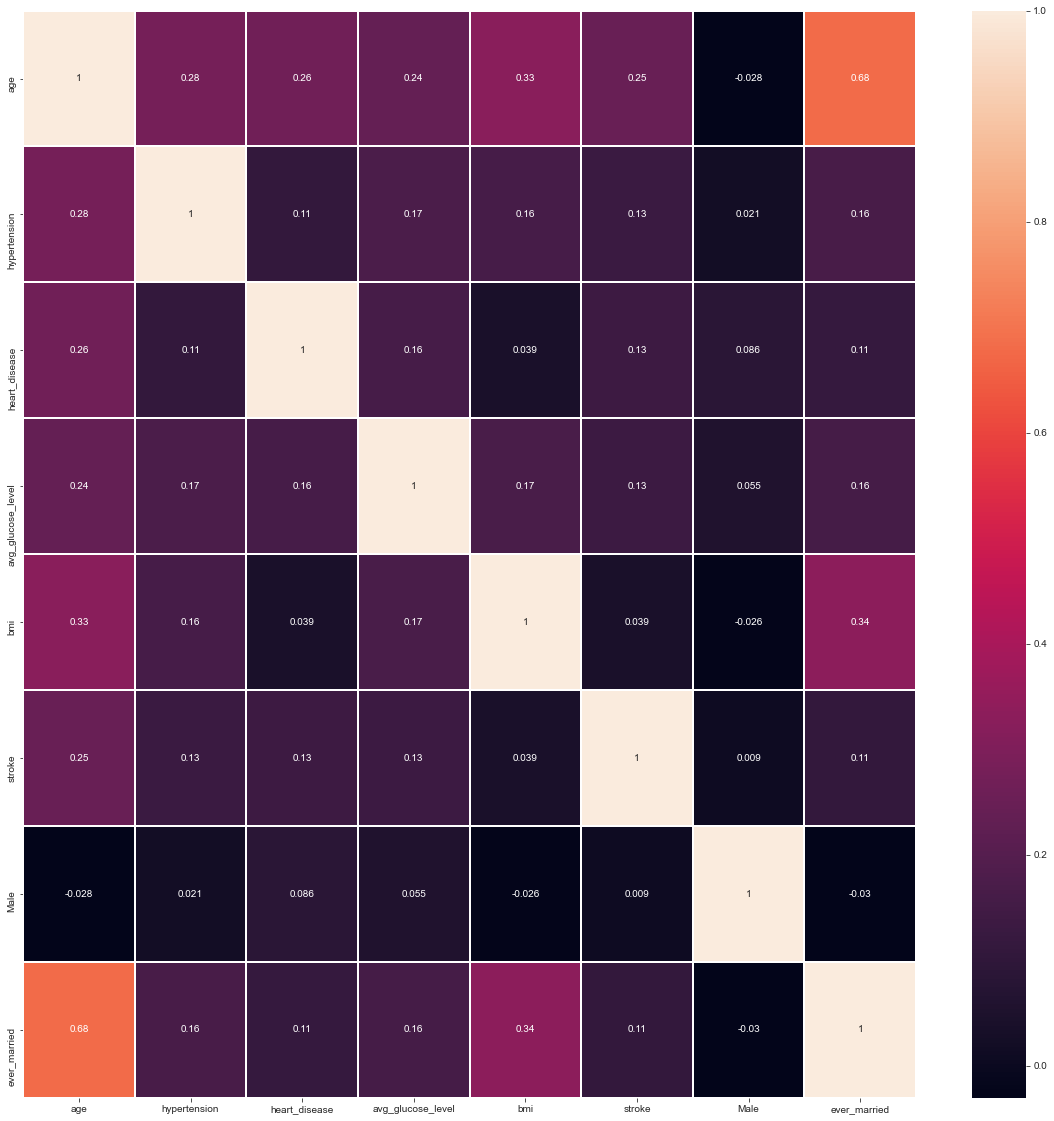

In [29]:
# Heatmap of Correlation matrix of Heart Disease DataFrame
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True, linewidths=2)
plt.show()

## Creating model and making predictions

In [30]:
X = df.drop(columns=["stroke"])
y = df["stroke"]

In [31]:
print('Shape of X:', X.shape)
X.head()

Shape of X: (5110, 7)


,age,hypertension,heart_disease,avg_glucose_level,bmi,Male,ever_married
0,67.0,0,1,228.69,36.600000,1,1
1,61.0,0,0,202.21,28.893237,0,1
2,80.0,0,1,105.92,32.500000,1,1
3,49.0,0,0,171.23,34.400000,0,1
4,79.0,1,0,174.12,24.000000,0,1


In [32]:
print('Shape of y:', y.shape)
y.head()

Shape of y: (5110,)


0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=101)

In [63]:
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (3832, 7)
Shape of X_test:  (1278, 7)
Shape of y_train:  (3832,)
Shape of y_test:  (1278,)


# Data Modeling and Visualization

## Decision Tree

In [64]:
DTree=DecisionTreeClassifier()

In [65]:
DTree.fit(X_train,y_train)

DecisionTreeClassifier()

In [66]:
lm_predictions=DTree.predict(X_test)

In [67]:
print(classification_report(y_test,lm_predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1198
           1       0.16      0.10      0.12        80

    accuracy                           0.91      1278
   macro avg       0.55      0.53      0.54      1278
weighted avg       0.89      0.91      0.90      1278



[[1155   43]
 [  72    8]]


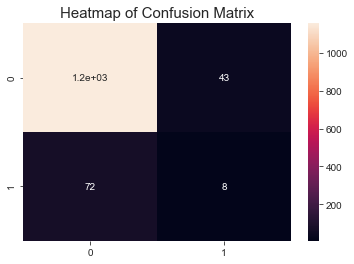

In [68]:
print(confusion_matrix(y_test,lm_predictions))
# Heatmap of Confusion Matrix
cm = confusion_matrix(y_test, lm_predictions)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

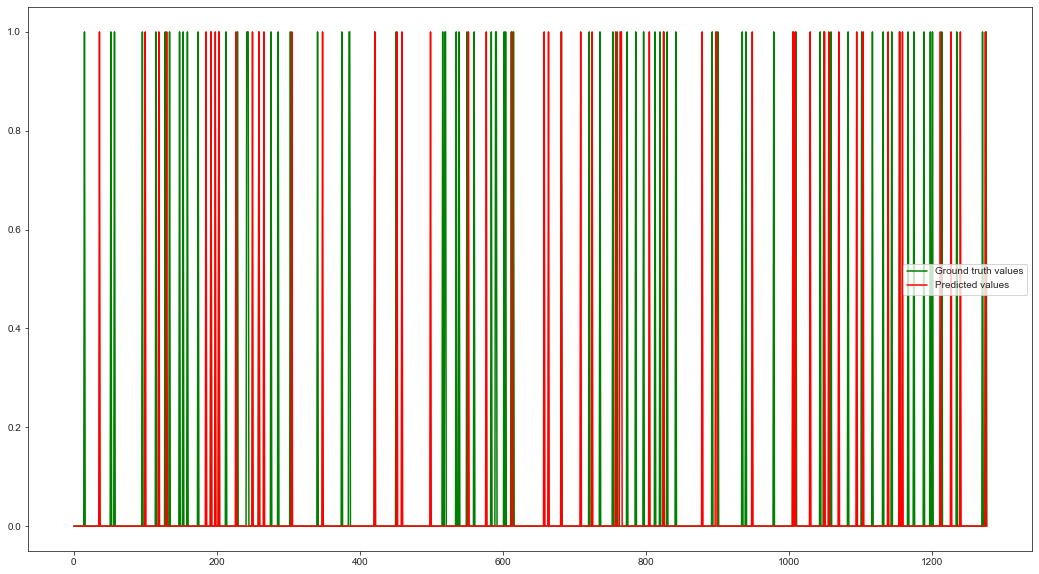

In [69]:
plt.figure(figsize=(18,10))
test_indexes =[x for x in range(len(y_test))]

# plotting the x and y axis with color and label
plt.plot(test_indexes, y_test, c= 'g', label= 'Ground truth values')

# plotting the x and y axis with color and label
plt.plot(test_indexes, lm_predictions, c='r', label= 'Predicted values')

plt.legend()
plt.show()

### prediction Score

In [70]:
DTree.score(X_test,y_test)

0.9100156494522692

#### Errors % in the model predictions

In [71]:
#Error in case of Decision tree model

mean_sq_error=mean_squared_error(y_test,lm_predictions)
print('Mean squared error: ',mean_sq_error)
print('Root mean squared error ',mean_sq_error**0.5)

Mean squared error:  0.08998435054773082
Root mean squared error  0.2999739164456317


## Random Forest Classifier

In [72]:
rfc=RandomForestClassifier()

In [73]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [74]:
prediction_rfc= rfc.predict(X_test)

In [75]:
print('Classification Report: ')
print(classification_report(y_test,prediction_rfc))

Classification Report: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.33      0.01      0.02        80

    accuracy                           0.94      1278
   macro avg       0.64      0.51      0.50      1278
weighted avg       0.90      0.94      0.91      1278



[[1196    2]
 [  79    1]]


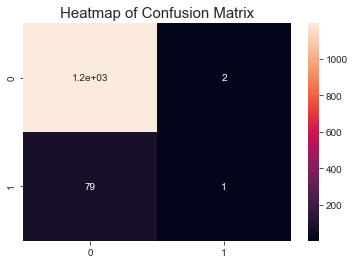

In [76]:
print(confusion_matrix(y_test,prediction_rfc))
# Heatmap of Confusion Matrix
cm = confusion_matrix(y_test, prediction_rfc)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

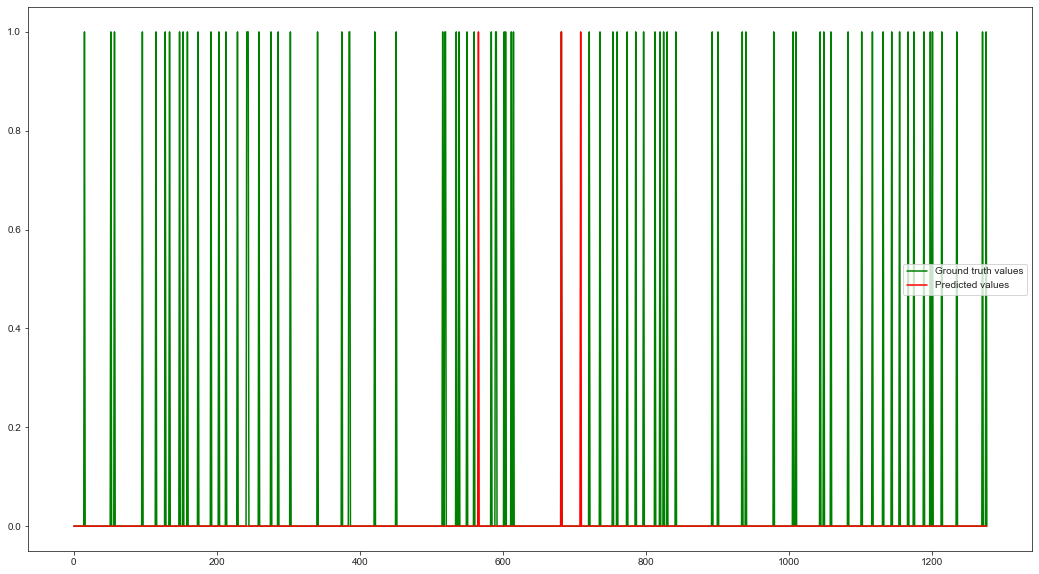

In [77]:
plt.figure(figsize=(18,10))
test_indexes =[x for x in range(len(y_test))]

# plotting the x and y axis with color and label
plt.plot(test_indexes, y_test, c= 'g', label= 'Ground truth values')

# plotting the x and y axis with color and label
plt.plot(test_indexes, prediction_rfc, c='r', label= 'Predicted values')

plt.legend()
plt.show()

### Prediction Score

In [78]:
rfc.score(X_test,y_test)

0.9366197183098591

#### Errors % in the model predictions

In [79]:
#Error in case of Random forest model

mean_sq_error_rfc=mean_squared_error(y_test,prediction_rfc)
print('Mean squared error: ',mean_sq_error_rfc)
print('Root mean squared error ',mean_sq_error_rfc**0.5)

Mean squared error:  0.06338028169014084
Root mean squared error  0.25175440748900674


# Logistic Regression

In [80]:
ls = LogisticRegression()

In [81]:
ls.fit(X_train,y_train)

LogisticRegression()

In [82]:
y_pred = ls.predict(X_test)

In [83]:
print('Classification Report: ')
print(classification_report(y_test,y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



[[1198    0]
 [  80    0]]


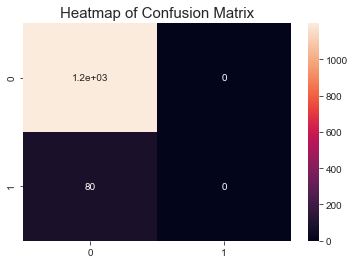

In [84]:
print(confusion_matrix(y_test,y_pred))
# Heatmap of Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

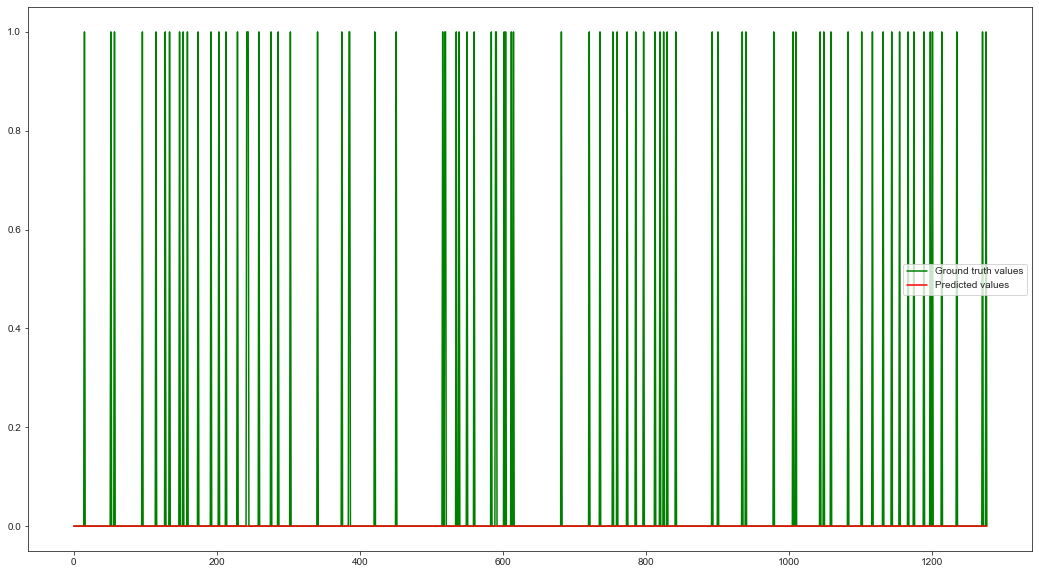

In [85]:
plt.figure(figsize=(18,10))
test_indexes =[x for x in range(len(y_test))]

# plotting the x and y axis with color and label
plt.plot(test_indexes, y_test, c= 'g', label= 'Ground truth values')

# plotting the x and y axis with color and label
plt.plot(test_indexes, y_pred, c='r', label= 'Predicted values')

plt.legend()
plt.show()

### Prediction Score

In [86]:
ls.score(X_test,y_test)

0.9374021909233177

In [87]:
#Error in case of Logistic Regression

mean_sq_error_rfc=mean_squared_error(y_test,y_pred)
print('Mean squared error: ',mean_sq_error_rfc)
print('Root mean squared error ',mean_sq_error_rfc**0.5)

Mean squared error:  0.06259780907668232
Root mean squared error  0.2501955416802672


# Model Saving

In [59]:
import joblib 
joblib.dump(ls, "classifier_model")

['classifier_model']

In [60]:
model_L = joblib.load("classifier_model")

In [61]:
model_L.predict(X_test)
model_L.score(X_test,y_test)

0.945226917057903